In [148]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('911.csv')

In [4]:
#** Check the head of df **
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [7]:
#** What are the top 5 zipcodes for 911 calls? **
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#** What are the top 5 townships (twp) for 911 calls? **
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
#** Take a look at the 'title' column, how many unique title codes are there? **
df['title'].nunique()

110

In [29]:
#Create new column Reason: For example, if the title column value is EMS: BACK PAINS/INJURY ,
#the Reason column value would be EMS.

df['Reason']=df['title'].apply(lambda title:title.split(':')[0])
df['Reason']


0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [32]:
#** What is the most common Reason for a 911 call based off of this new column? **
#df['Reason'].value_counts()
df.groupby('Reason')['Reason'].count()

Reason
EMS        48877
Fire       14920
Traffic    35695
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

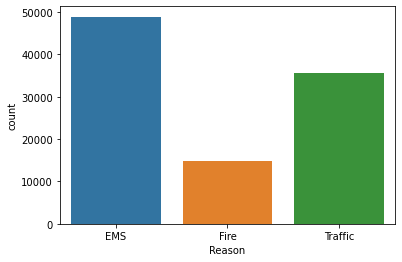

In [33]:
#** Now use seaborn to create a countplot of 911 calls by Reason. **
sns.countplot(x='Reason',data=df)

In [48]:
#** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **
type(df['timeStamp'].iloc[0])

str

In [167]:
#convert the column timeStamp from strings to DateTime objects. 
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [65]:
# create 3 columns for Hour, Month and Day of Week
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of week']=df['timeStamp'].apply(lambda time:time.dayofweek)
df['Day of week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of week, Length: 99492, dtype: int64

In [62]:
# map days of week to string days as they are in number
df['Day of week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of week, Length: 99492, dtype: object

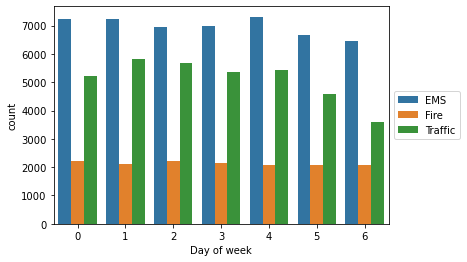

In [67]:
#** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. *
sns.countplot(x='Day of week',hue='Reason',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

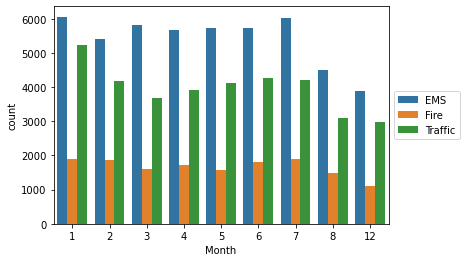

In [69]:
sns.countplot(x='Month',hue='Reason',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [96]:
bymonth=df.groupby(['Month']).count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

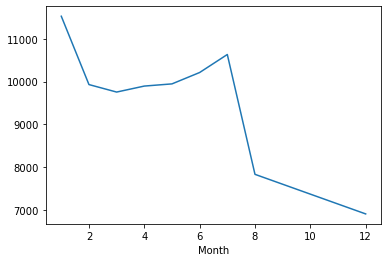

In [97]:
#** Now create a simple plot off of the dataframe indicating the count of calls per month. **
bymonth.zip.plot()

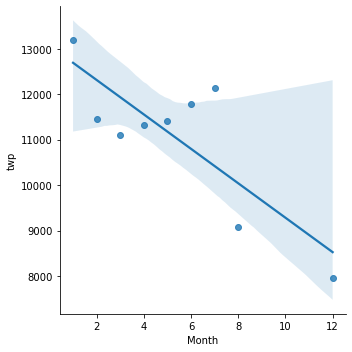

In [105]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())
new_style = {'grid': True}

In [106]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [107]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())

In [108]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

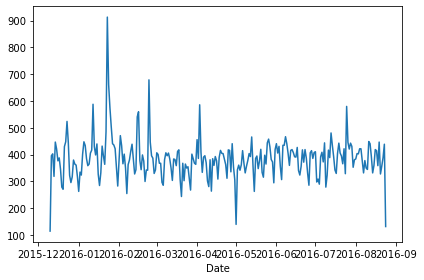

In [146]:
df.groupby('Date').count()['lat'].plot()
sns.set_title='Lat'
plt.tight_layout()

In [144]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

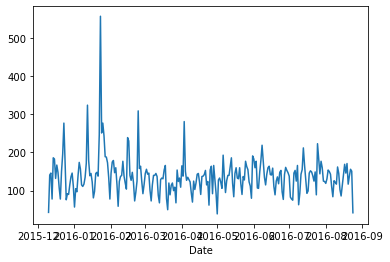

In [147]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title=('Traffic')

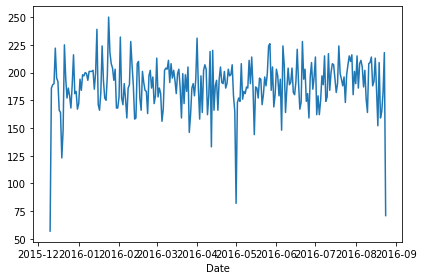

In [149]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title=('EMS')
plt.tight_layout()

<AxesSubplot:xlabel='Hour', ylabel='Day of week'>

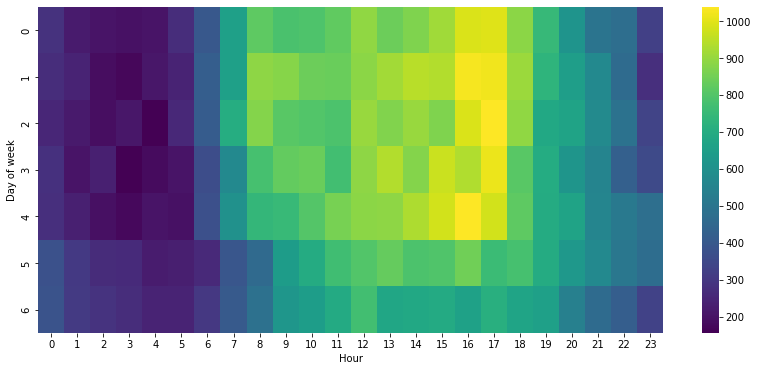

In [160]:
plt.figure(figsize=(14,6))
bydayofweek=df.pivot_table(index='Day of week',values='lat',columns='Hour',aggfunc='count')
sns.heatmap(bydayofweek,cmap='viridis')

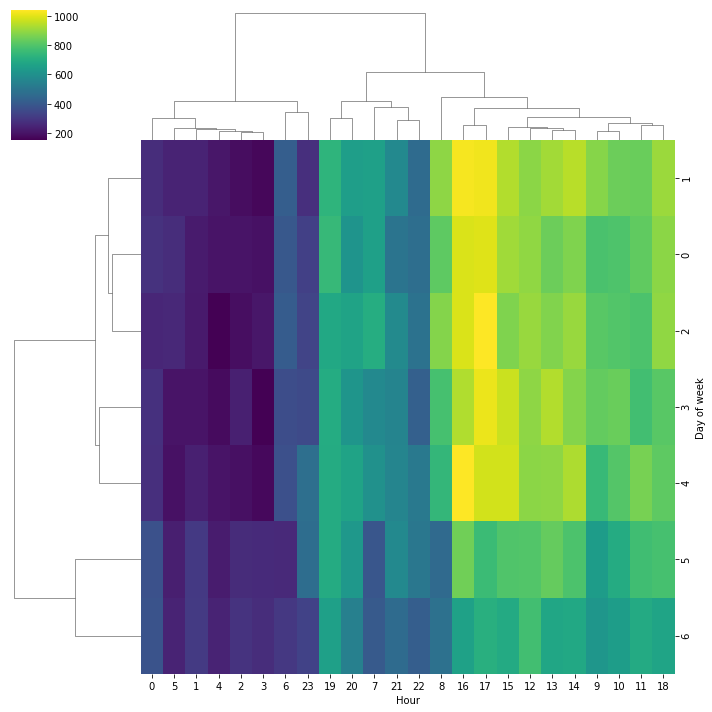

In [161]:
sns.clustermap(bydayofweek,cmap='viridis')

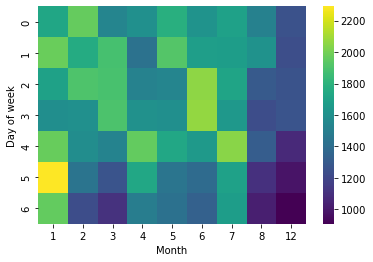

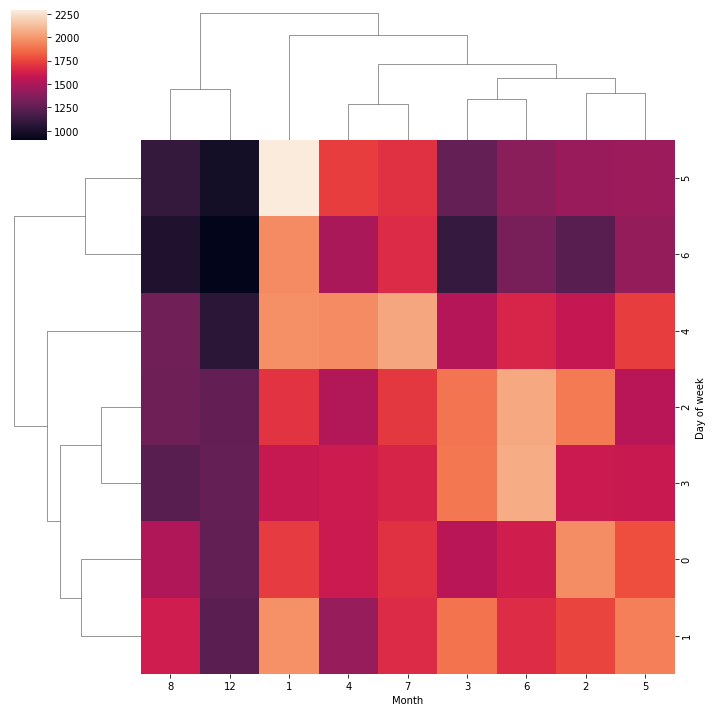

In [166]:
bymonth=df.pivot_table(index='Day of week',values='lat',columns='Month',aggfunc='count')
sns.heatmap(bymonth,cmap='viridis')
sns.clustermap(bymonth)